In [1]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net_extend import MultiLayerNetExtend
from common.optimizer import *

In [2]:
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 학습 데이터를 줄임
x_train = x_train[:1000]
t_train = t_train[:1000]

max_epochs = 20
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.01

In [3]:
def __train(weight_init_std):
    bn_network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100], output_size=10, 
                                    weight_init_std=weight_init_std, use_batchnorm=True)
    network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100], output_size=10,
                                weight_init_std=weight_init_std)
    #optimizer = SGD(lr=learning_rate)
    #optimizer = Momentum(lr=learning_rate)
    #optimizer = AdaGrad(lr=learning_rate)

    optimizer = Adam(lr=learning_rate)
    
    train_acc_list = []
    bn_train_acc_list = []
    
    iter_per_epoch = max(train_size / batch_size, 1)
    epoch_cnt = 0
    
    for i in range(1000000000):
        batch_mask = np.random.choice(train_size, batch_size)
        x_batch = x_train[batch_mask]
        t_batch = t_train[batch_mask]
    
        for _network in (bn_network, network):
            grads = _network.gradient(x_batch, t_batch)
            optimizer.update(_network.params, grads)
    
        if i % iter_per_epoch == 0:
            train_acc = network.accuracy(x_train, t_train)
            bn_train_acc = bn_network.accuracy(x_train, t_train)
            train_acc_list.append(train_acc)
            bn_train_acc_list.append(bn_train_acc)
    
            print("epoch:" + str(epoch_cnt) + " | " + str(train_acc) + " - " + str(bn_train_acc))
    
            epoch_cnt += 1
            if epoch_cnt >= max_epochs:
                break
                
    return train_acc_list, bn_train_acc_list

============== 1/16 ==============
epoch:0 | 0.129 - 0.12
epoch:1 | 0.352 - 0.175
epoch:2 | 0.594 - 0.306
epoch:3 | 0.74 - 0.418
epoch:4 | 0.787 - 0.457
epoch:5 | 0.839 - 0.497
epoch:6 | 0.903 - 0.536
epoch:7 | 0.932 - 0.577
epoch:8 | 0.944 - 0.591
epoch:9 | 0.96 - 0.627
epoch:10 | 0.962 - 0.659
epoch:11 | 0.977 - 0.687
epoch:12 | 0.978 - 0.713
epoch:13 | 0.976 - 0.73
epoch:14 | 0.985 - 0.752
epoch:15 | 0.984 - 0.765
epoch:16 | 0.984 - 0.776
epoch:17 | 0.996 - 0.798
epoch:18 | 0.996 - 0.806
epoch:19 | 0.997 - 0.81
============== 2/16 ==============
epoch:0 | 0.102 - 0.139
epoch:1 | 0.497 - 0.228
epoch:2 | 0.66 - 0.429
epoch:3 | 0.764 - 0.535
epoch:4 | 0.843 - 0.635
epoch:5 | 0.877 - 0.698
epoch:6 | 0.905 - 0.748
epoch:7 | 0.936 - 0.766
epoch:8 | 0.957 - 0.79
epoch:9 | 0.962 - 0.819
epoch:10 | 0.966 - 0.846
epoch:11 | 0.966 - 0.866
epoch:12 | 0.976 - 0.872
epoch:13 | 0.983 - 0.886
epoch:14 | 0.974 - 0.898
epoch:15 | 0.991 - 0.921
epoch:16 | 0.988 - 0.92
epoch:17 | 0.986 - 0.934
epoch:18

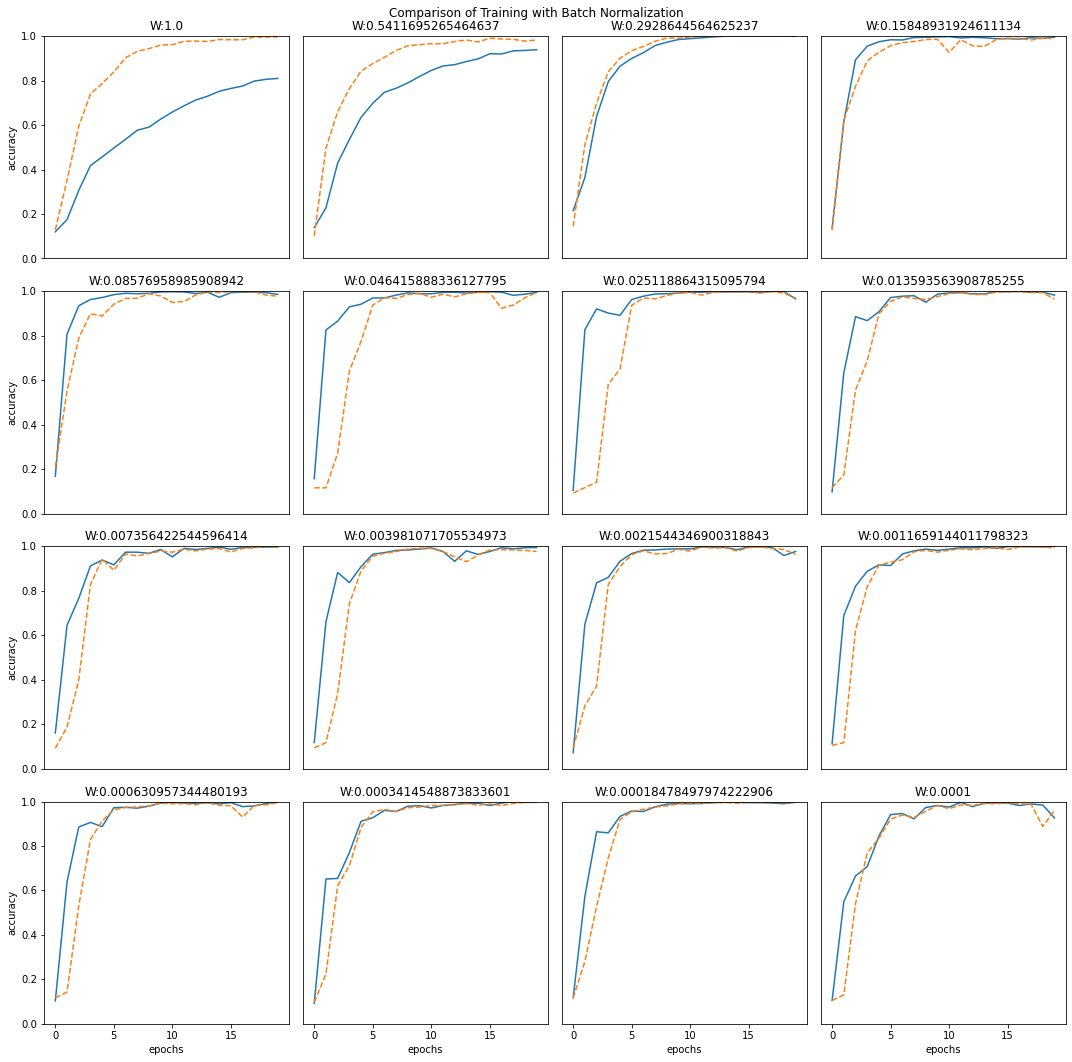

In [4]:
# 그래프 그리기==========
weight_scale_list = np.logspace(0, -4, num=16)
x = np.arange(max_epochs)

fig, axs = plt.subplots(4, 4, figsize=(15, 15))

for i, w in enumerate(weight_scale_list):
    print("============== " + str(i + 1) + "/16 ==============")
    train_acc_list, bn_train_acc_list = __train(w)

    row = i // 4  # 현재 subplot의 행 인덱스
    col = i % 4   # 현재 subplot의 열 인덱스

    # Batch Normalization과 일반 모델의 정확도 그래프
    axs[row, col].plot(np.arange(max_epochs), bn_train_acc_list, label='Batch Normalization', markevery=2)
    axs[row, col].plot(np.arange(max_epochs), train_acc_list, linestyle="--", label='Normal(without BatchNorm)', markevery=2)

    axs[row, col].set_title("W:" + str(w))
    axs[row, col].set_ylim(0, 1.0)

    # 각 서브플롯의 레이아웃 설정
    if col > 0:
        axs[row, col].set_yticks([])
    else:
        axs[row, col].set_ylabel("accuracy")

    if row < 3:
        axs[row, col].set_xticks([])
    else:
        axs[row, col].set_xlabel("epochs")

    # axs[row, col].legend(loc='lower right')

# 전체 그림의 제목
fig.suptitle('Comparison of Training with Batch Normalization')

# 레이아웃 조정
plt.tight_layout()

# 그림 보여주기
plt.show()